<a href="https://colab.research.google.com/github/maheshkajjari/Titanic-dataset/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic dataset

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Before applying any ML algorithms in data, we need to understand the data which we are going to follow. Without data understanding there will be a possibility of ML model failure. The understanding of data is nothing but this EDA.

Analysis by Mahesh Kajjari

Uploading doc file from system

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mahesh Kajjari - train(1).csv to Mahesh Kajjari - train(1).csv


Loading the Dataset:

In [ ]:
import pandas as pd
import io
train_data = pd.read_csv(io.StringIO(uploaded['Mahesh Kajjari - train(1).csv'].decode('utf-8')))

In [ ]:
df= train_data

Importing all libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



Observations from above

'Age' has 714 non nulls which means we have 891-714= 177,which means 20% of total values in Age are null.

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Shape of the data 

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Univariate EDA

Before proceeding further into the Univariate analysis , we have the statistical summary of the data which can b seen below.

In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"West, Mr. Edwy Arthur",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,CA. 2343,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


What is the Count of Survived vs Not Survived?

In [ ]:
df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


Observation : here 1 is yes ..which means 342 survived and 0 is no .. 549 is not survived

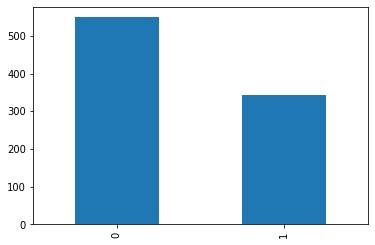

In [ ]:
df['Survived'].value_counts().plot(kind = 'bar')
plt.show()

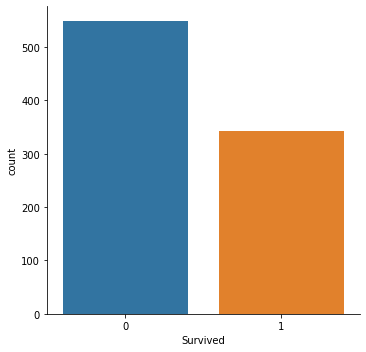

In [ ]:
sns.factorplot('Survived', data=df, kind='count')

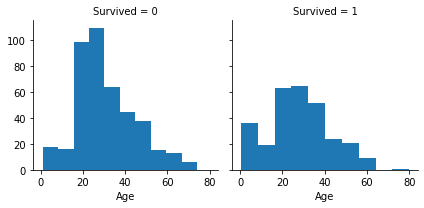

In [ ]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=10)

Visualizing EDA for  "Embarked" 

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

 Here Port of Embarkation means(C = Cherbourg; Q = Queenstown; S = Southamptong

 Which has values 

S  = 644


C   = 168


Q    = 77

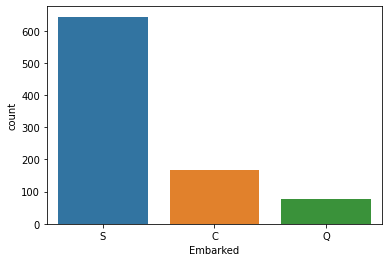

In [ ]:
sns.countplot(data = df, x = 'Embarked')

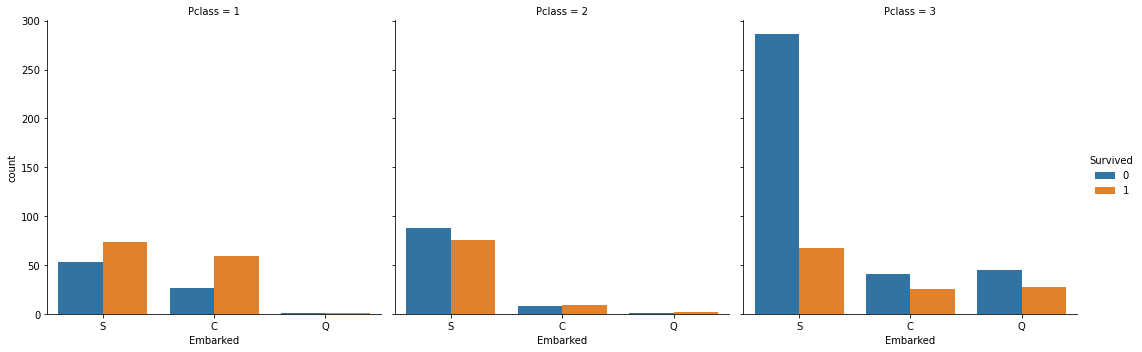

In [ ]:
sns.catplot(x ='Embarked', hue ='Survived',  
kind ='count', col ='Pclass', data = df) 

Visualizing EDA  "Fare" using Distribution Plot

In [ ]:
df['Fare'].to_frame()

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


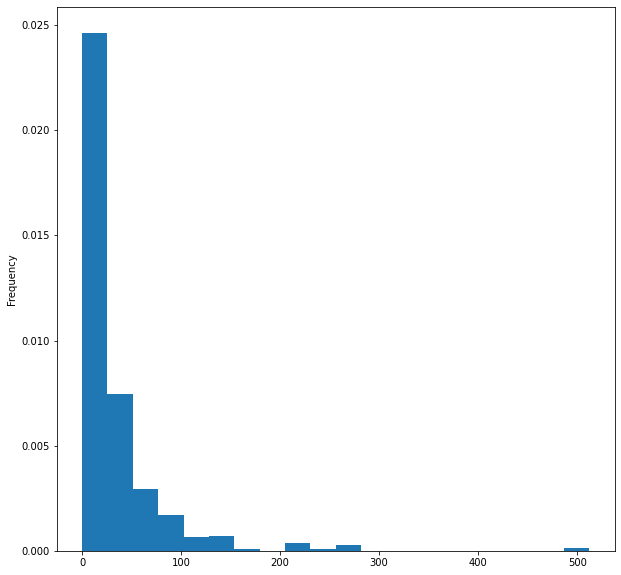

In [ ]:
 plt.figure(figsize=(10,10))
df['Fare'].plot(kind = 'hist',bins = 20 , density = True)
plt.show()

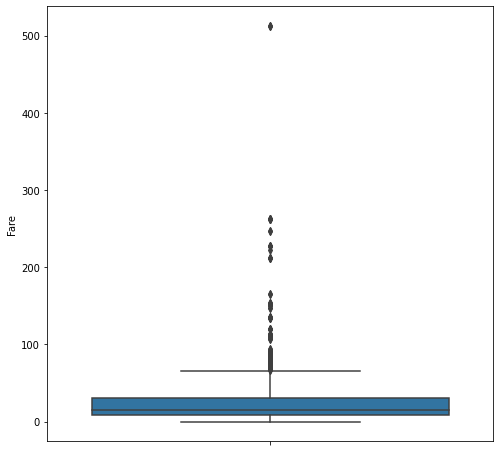

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y = 'Fare', data = df)

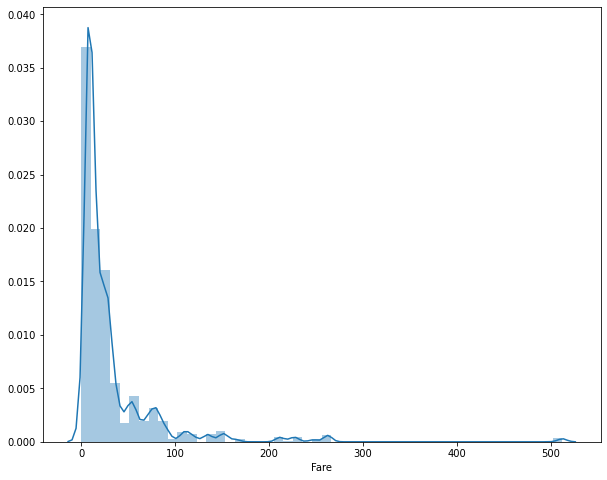

In [ ]:
plt.figure(figsize = (10,8))
sns.distplot(df['Fare'])
plt.show()

Visualizing EDA  for "Fare" using KDE(Kernel Density Estimation) Plot*

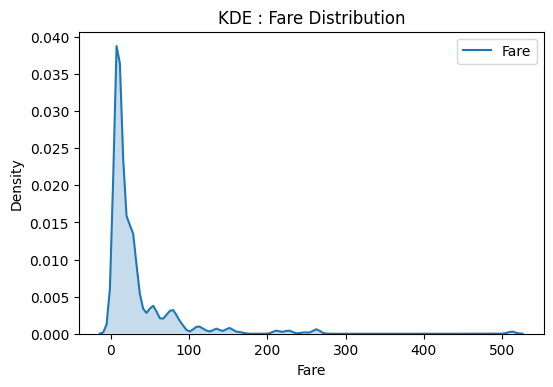

In [ ]:
plt.figure(dpi = 100)
sns.kdeplot(df['Fare'], shade = True)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('KDE : Fare Distribution')
plt.show()

Kernel Density Estimation for 'Fare' distribution shows high probability for fare between 0 and 50 

Exploratory Data Analysis (EDA) for AGE

In [ ]:
 df['age_bracket'] = pd.cut(df['Age'],bins =[0,20,30,40,50,60,70,80,np.inf],labels = ['0-20','20-30','30-40','40-50','50-60','60-70','70-80','80+'])


cutiing into age bracket as shows above

In [ ]:
df['age_bracket'].value_counts().to_frame().sort_index()

,age_bracket
0-20,179
20-30,230
30-40,155
40-50,86
50-60,42
60-70,17
70-80,5
80+,0


In [ ]:
df=df.query('Age < 90')

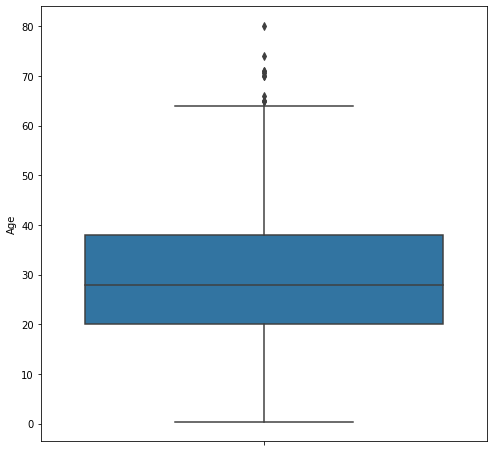

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y = 'Age', data = df)

 

Observation:

  1. Firstly from the data df we can see that Age has missing values. i.e 20% values.

   2. Majority of passengers are within 20 to 40 years.

    3. We see outliers above 62 years.




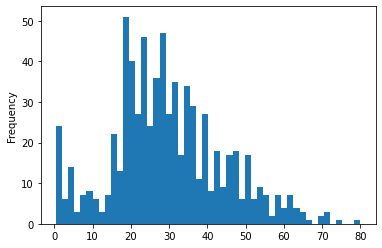

In [ ]:
df['Age'].plot(kind='hist',bins=50)

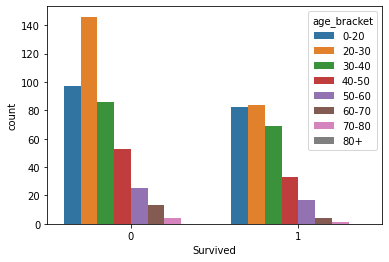

In [ ]:
sns.countplot(x = 'Survived',hue = 'age_bracket', data = df)

observation:
 


Bivariate EDA:

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


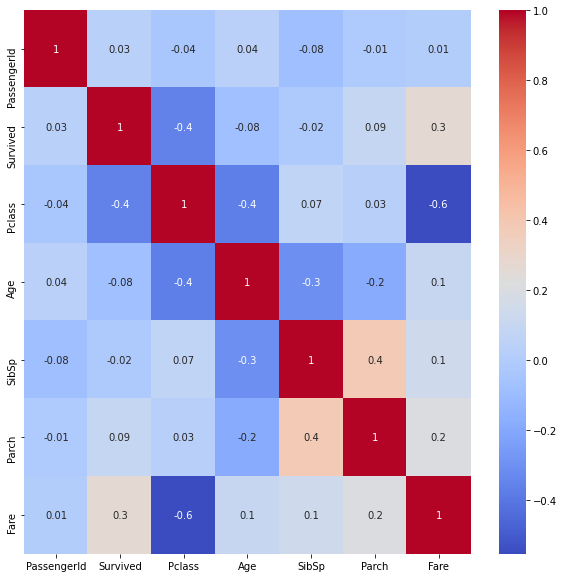

In [ ]:
plt.figure(figsize=(10,10))
matrix= np.triu(df.corr())
sns.heatmap(df.corr(), annot = True ,fmt = '.1g', cmap='coolwarm')

What is the count of Males and Females Survived and Not Survived in each Class?

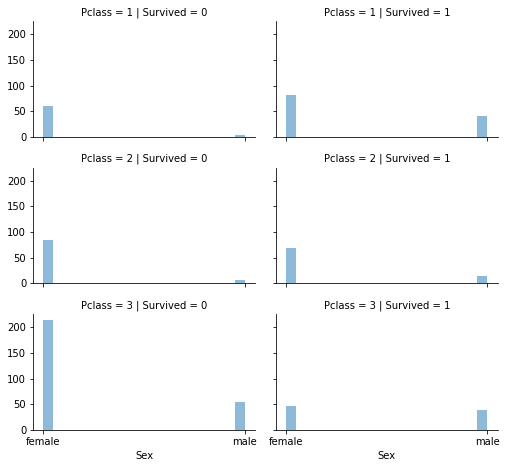

In [ ]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Sex', alpha=.5, bins=20)
grid.add_legend();

Visualizing Survived and Not Survived with respect to the 'Embarked' Column:

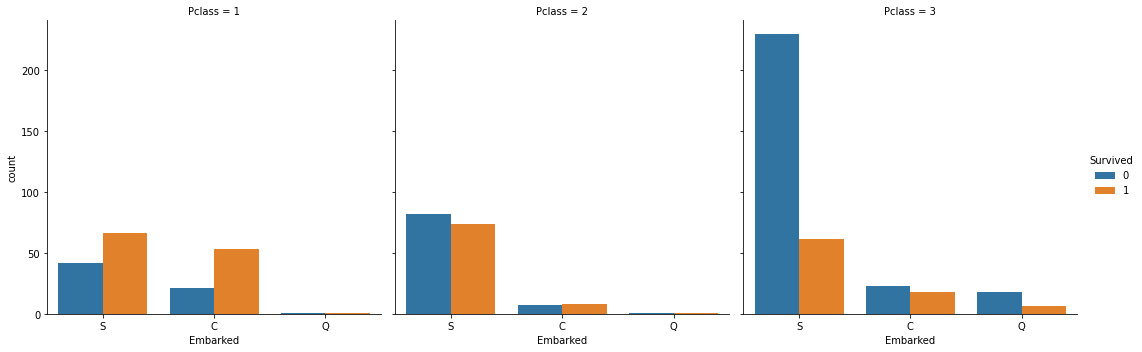

In [ ]:
sns.catplot(x ='Embarked', hue ='Survived',kind ='count', col ='Pclass', data = df) 

Some notable observations are:

   1. Majority of the passengers boarded from S. So, the missing values can be filled with S.
   2. Majority of class 3 passengers boarded from Q.
   3. S looks lucky for class 1 and 2 passengers compared to class 3.


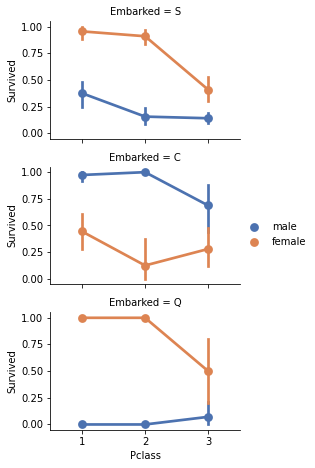

In [ ]:
grid = sns.FacetGrid(df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

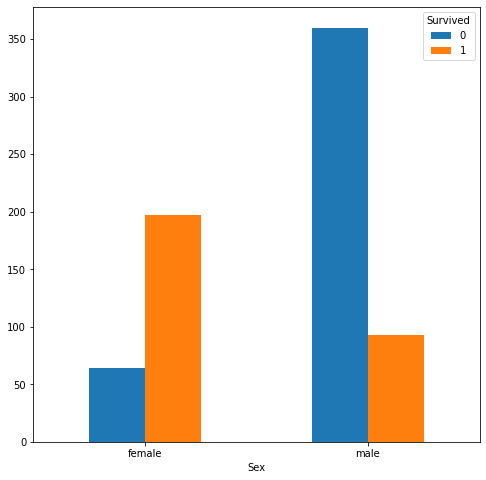

In [ ]:
pd.crosstab(df['Sex'] , df['Survived']).plot(kind = 'bar' , figsize = (8,8) , rot = 0).set(xlabel = 'Sex')
plt.show()

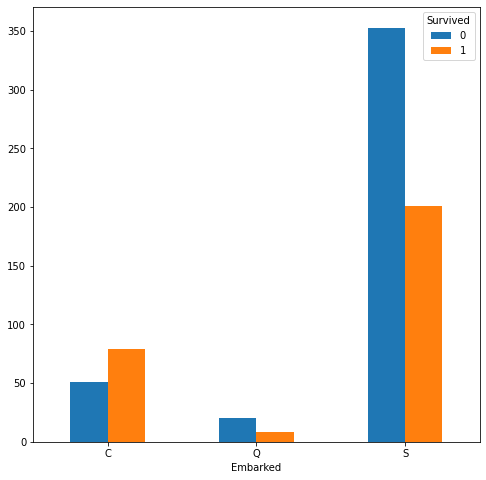

In [ ]:
pd.crosstab(df['Embarked'] , df['Survived']).plot(kind = 'bar' , figsize = (8,8) , rot = 0).set(xlabel = 'Embarked')
plt.show()

Calculating for Survival_rate

In [ ]:
Survival_rate =df['Survived'].value_counts(normalize = True)*100

In [ ]:
Survival_rate

0    59.383754
1    40.616246
Name: Survived, dtype: float64

In [ ]:
 Survival_rate.to_frame()

,Survived
0,59.383754
1,40.616246


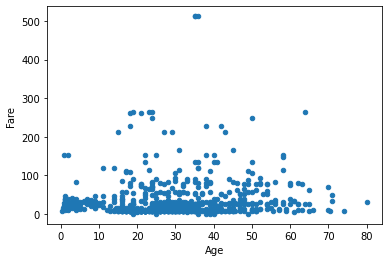

In [ ]:
df.plot(kind = 'scatter' , x= 'Age' ,y= 'Fare').set(xlabel = 'Age' , ylabel = 'Fare ')
plt.show()

observations
from the above scatter plot we can say that the fare is less tha 100 for most the age .

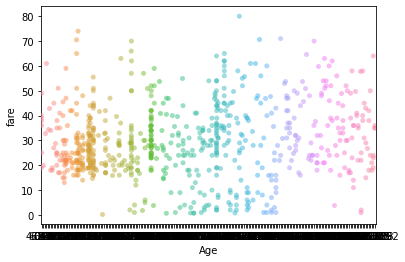

In [ ]:
g = sns.stripplot(x=df["Fare"] , y=df['Age'] , jitter=True ,alpha = 0.5)
g.set_xlabel('Age')
g.set_ylabel('fare')
plt.show()

How are "Age" and "Fare" Columns related? Ploting a Graph for the same:

AttributeError: ignored

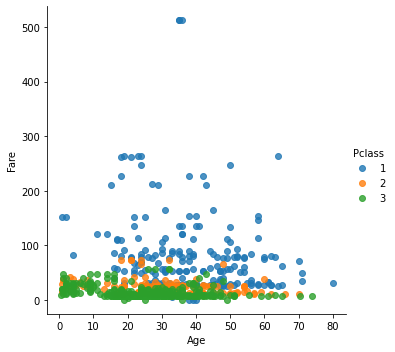

In [ ]:
sns.lmplot('Age', 'Fare', data=df, fit_reg=False, hue="Pclass")
sns.plt.title('Scatterplot of passengers w.r.t Fare and Age')

Multivariate EDA:

Does Age have an impact on Survival Rate for each Sex and Class group

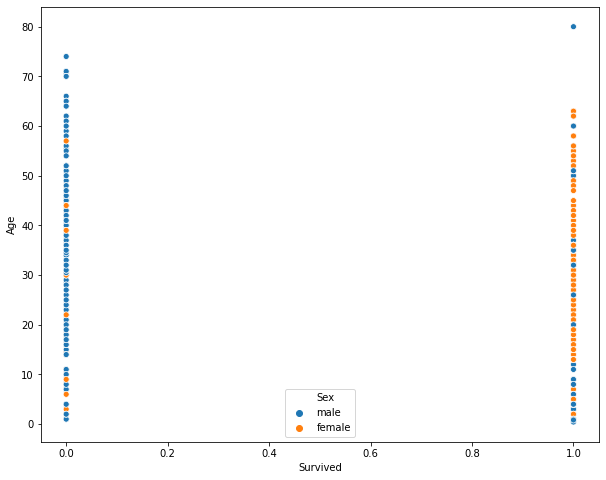

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Survived', y = 'Age', hue = 'Sex',data = df)


Conclusion :


From my exploratory analysis of Titanic dataset we conclude that
1. women had higher chances of survival.
2.We can also observe that lot of passengers embarked from port of Southampton.
3. Greater the age lower the chances of Survival.

 

